In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('image2.png')
# 获取图像尺寸
height, width, _ = img.shape

### 1.平移：x轴平移100像素，y轴平移150像素

In [3]:
# 定义平移矩阵 M：[[1,0,x],[0,1,y]] x：水平方向偏移量
M = np.float32([[1, 0, 100], [0, 1, 150]])
# 平移 (width,height)是输出图像的尺寸
img_py = cv2.warpAffine(img,M,(width,height))

In [4]:
# 显示平移后的图像
cv2.imshow("origin", img)
cv2.imshow('Translated', img_py)
cv2.namedWindow('origin', cv2.WINDOW_NORMAL)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 2.缩放：缩放到1024*768

In [36]:
img_sf1 = cv2.resize(img, (1024, 768))
cv2.imshow('Scaled to 1024x768', img_sf1)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 按比例缩小60%

In [38]:
img_sf2 = cv2.resize(img, (0, 0), fx=0.6, fy=0.6, interpolation=cv2.INTER_NEAREST)
cv2.imshow('Scaled by 60%', img_sf2)
cv2.imshow("origin", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 3.翻转

In [39]:
# 水平翻转
flip_horiz_img = cv2.flip(img, 1)
# 垂直翻转
flip_verti_img = cv2.flip(img, 0)
# 水平垂直翻转
flip_horandver_img = cv2.flip(img, -1)

In [40]:
cv2.imshow('horiz', flip_horiz_img)
cv2.imshow('verti', flip_verti_img)
cv2.imshow('h+v', flip_horandver_img)
cv2.imshow("origin", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 4.旋转：给出旋转中心，旋转角度，对图片旋转

In [41]:
rows, cols, _ = img.shape
# 90度旋转 以图像的中心为旋转中心
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
img_rotate = cv2.warpAffine(img, M, (cols,rows))

In [42]:
cv2.imshow('rotate', img_rotate)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5.缩略：将图片缩小，放到原图的左上角

In [43]:
# 缩小图片 40%
resized_img = cv2.resize(img, (0, 0), fx=0.4, fy=0.4, interpolation=cv2.INTER_NEAREST )
cv2.imwrite('small.png', resized_img)
# 获取小图的尺寸
height_, width_ = resized_img.shape[:2]

叠加缩略图opencv画布不太好用

In [12]:
'''
# 将缩小后的图片叠加到原图的左上角
roi = img[0:height_, 0:width_] # 原图的左上角区域
result = cv2.addWeighted(roi, 0.5, resized_img, 0.5, 0) # 加权叠加函数 0.5和0.5分别是图像A和图像B的权重系数，表示在叠加结果中两个图像的贡献度相等。0表示不进行亮度调整。
# 将叠加后的区域放回图像B中
img[0:height_, 0:width_] = result 
cv2.imshow('suolue', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

PIL好

In [44]:
import matplotlib.pyplot as plt
from PIL import Image

In [45]:
img= Image.open("image2.png")  # 原图
im_crop=Image.open("small.png") # 缩略图
img.paste(im_crop, (0,0))  # 括号中为左上角坐标,a为x坐标，b为y坐标

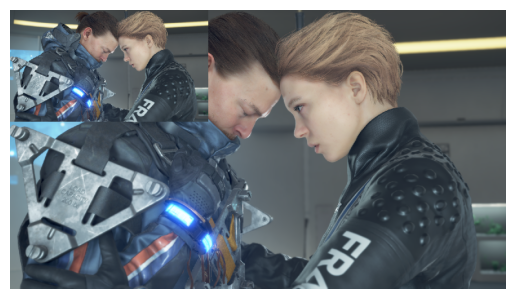

In [46]:
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.show()

img.save("suolue.png")  #图片保存